<a href="https://colab.research.google.com/github/JulietaRomanelli/Corrector-examenes/blob/main/Algoritmo_corrector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargo las librerias que se utilizarán

In [ ]:
!pip install textacy

In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import textacy.preprocessing as tprep
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Cargo la base de datos

In [22]:
!gdown --id 1S21PTD7erS6GecuZfySF_zEVpNODCGxr
df = pd.read_csv("IO Respuestas.csv")
from google.colab import data_table
data_table.DataTable(df)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1S21PTD7erS6GecuZfySF_zEVpNODCGxr
To: /content/IO Respuestas.csv
100% 17.4k/17.4k [00:00<00:00, 16.6MB/s]


,Marca temporal,Dirección de correo electrónico,Padrón sin números,¿qué es la Investigación Operativa?
0,30/03/2022 17:49:38,pcortif@fi.uba.ar,100723,Se basa en la utilización de métodos analític...
1,30/03/2022 18:00:36,mcirolini@fi.uba.ar,97739,"Optimización y diseño de operaciones, control ..."
2,30/03/2022 18:30:40,rparedes@fi.uba.ar,97920,Aplicaciones de métodos operativos a la vida real
3,30/03/2022 19:20:14,mledesma@fi.uba.ar,102908,La optimización de las operaciones mediante el...
4,30/03/2022 19:20:32,tandrada@fi.uba.ar,100586,Una forma interdisciplinaria de resolver probl...
...,...,...,...,...
116,30/03/2022 21:52:35,jrenovales@fi.uba.ar,103787,Es el area que se encarga de aplicar distintos...
117,30/03/2022 23:07:20,jovillamil@fi.uba.ar,99825,NaN
118,31/03/2022 12:00:41,npesaresi@fi.uba.ar,104911,Aplicación de la ciencia moderna a problemas c...
119,1/04/2022 17:30:14,mjung@fi.uba.ar,102939,No pude completar la encuesta con el celular e...


Extraigo algunas columnas del df, hacia otro

In [24]:
df_2 = df[['Padrón sin números','¿qué es la Investigación Operativa?']]
df_2.columns = ['Padron', 'Respuestas']

In [25]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Tokenizacion, remocion de las stop words y stemming

In [26]:
stemmer = SnowballStemmer('spanish')
for i in range (len(df_2)):
  df_2['Respuestas'][i] = word_tokenize(str(df_2['Respuestas'][i]).lower())
  df_2['Respuestas'][i] = [word for word in df_2['Respuestas'][i] if word not in stopwords.words('spanish')]
  df_2['Respuestas'][i] = [stemmer.stem(t) for t in df_2['Respuestas'][i]]
df_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Padron,Respuestas
0,100723,"[bas, utiliz, metod, analit, ayud, tom, mejor,..."
1,97739,"[optimiz, diseñ, oper, ,, control, proces, ind..."
2,97920,"[aplic, metod, oper, vid, real]"
3,102908,"[optimiz, oper, mediant, uso, program]"
4,100586,"[form, interdisciplinari, resolv, problem, mul..."
...,...,...
116,103787,"[are, encarg, aplic, distint, metod, oper, ayu..."
117,99825,[nan]
118,104911,"[aplic, cienci, modern, problem, complej, apar..."
119,102939,"[pud, complet, encuest, celul, dia, clas, ., d..."


Analizo la definicion o palabras clave a comparar.

In [27]:
answer = ['método', 'modelo', 'optimizar', 'problema', 'decisiones','analítico','matemático','soluciones']
answer = [stemmer.stem(t) for t in answer]
answer

['metod',
 'model',
 'optimiz',
 'problem',
 'decision',
 'analit',
 'matemat',
 'solucion']

In [28]:
from collections import Counter

Anado una columna para los scores

In [29]:
df_2['Score'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
for i in range (len(df_2)):
  df_2['Score'][i] =  list((Counter(answer) & Counter(df_2['Respuestas'][i])).elements())
  df_2['Score'][i] = len(df_2['Score'][i])
df_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assi

,Padron,Respuestas,Score
0,100723,"[bas, utiliz, metod, analit, ayud, tom, mejor,...",3
1,97739,"[optimiz, diseñ, oper, ,, control, proces, ind...",1
2,97920,"[aplic, metod, oper, vid, real]",1
3,102908,"[optimiz, oper, mediant, uso, program]",1
4,100586,"[form, interdisciplinari, resolv, problem, mul...",1
...,...,...,...
116,103787,"[are, encarg, aplic, distint, metod, oper, ayu...",2
117,99825,[nan],0
118,104911,"[aplic, cienci, modern, problem, complej, apar...",1
119,102939,"[pud, complet, encuest, celul, dia, clas, ., d...",0


Añado una columna en el df original para las notas

In [32]:
df['Notas'] = 0

Defino las notas

In [34]:
for i in range(len(df_2)):
  if df_2['Score'][i] < df_2['Score'].quantile(0.6):
    df['Notas'][i] = 0
  elif df_2['Score'][i] >= df_2['Score'].quantile(0.6) and df_2['Score'][i] <= df_2['Score'].quantile(0.8):
    df['Notas'][i] = 1
  elif df_2['Score'][i] > df_2['Score'].quantile(0.8):
    df['Notas'][i] = 2
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Marca temporal,Dirección de correo electrónico,Padrón sin números,¿qué es la Investigación Operativa?,Notas
0,30/03/2022 17:49:38,pcortif@fi.uba.ar,100723,Se basa en la utilización de métodos analític...,2
1,30/03/2022 18:00:36,mcirolini@fi.uba.ar,97739,"Optimización y diseño de operaciones, control ...",1
2,30/03/2022 18:30:40,rparedes@fi.uba.ar,97920,Aplicaciones de métodos operativos a la vida real,1
3,30/03/2022 19:20:14,mledesma@fi.uba.ar,102908,La optimización de las operaciones mediante el...,1
4,30/03/2022 19:20:32,tandrada@fi.uba.ar,100586,Una forma interdisciplinaria de resolver probl...,1
...,...,...,...,...,...
116,30/03/2022 21:52:35,jrenovales@fi.uba.ar,103787,Es el area que se encarga de aplicar distintos...,1
117,30/03/2022 23:07:20,jovillamil@fi.uba.ar,99825,NaN,0
118,31/03/2022 12:00:41,npesaresi@fi.uba.ar,104911,Aplicación de la ciencia moderna a problemas c...,1
119,1/04/2022 17:30:14,mjung@fi.uba.ar,102939,No pude completar la encuesta con el celular e...,0


Grafico Alumnos vs. Cantidad de palabras acertadads

Text(0, 0.5, 'Palabras coincidentes')

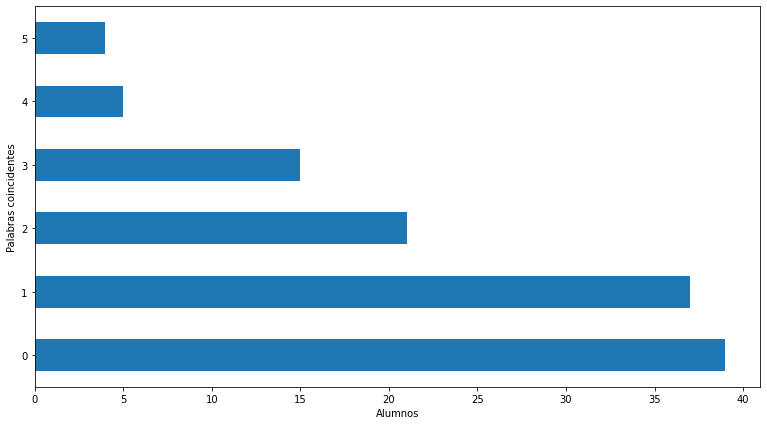

In [36]:
fig,axis = plt.subplots(nrows = 1, ncols = 1, figsize =(13,7))
df_2['Score'].value_counts(ascending = True).plot(kind='barh', ax=axis)
axis.invert_yaxis()
axis.set_xlabel('Alumnos')
axis.set_ylabel('Palabras coincidentes')

Grafico Alumnos vs. Notas

Text(0, 0.5, 'Notas')

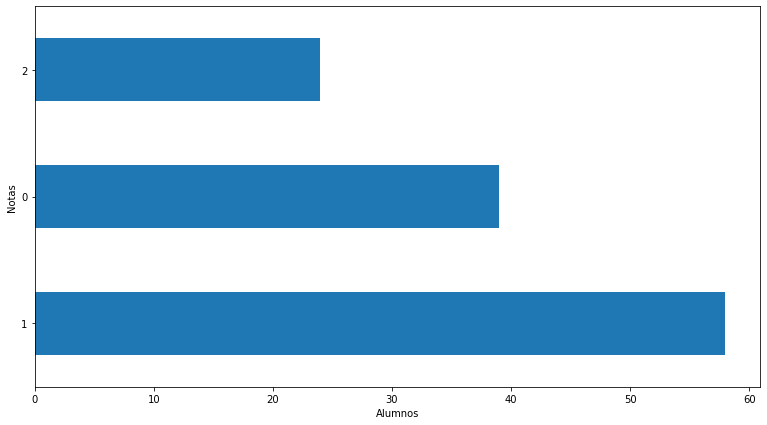

In [39]:
fig,axis = plt.subplots(nrows = 1, ncols = 1, figsize =(13,7))
df['Notas'].value_counts(ascending = True).plot(kind='barh', ax=axis)
axis.invert_yaxis()
axis.set_xlabel('Alumnos')
axis.set_ylabel('Notas')